# Notebook E-tivity 3 CE4021 Task 1

Student name: Julieta Rubis

Student ID: 23233729

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [40]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1: Option Dice

Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

## Discrete random variable
A random variable is a mathematical construct used to represent the outcomes of a random process. Discrete random variables take on specific, distinct values, typically integers, and have well-defined probabilities associated with each possible value.

## Uniform Distribution
A uniform distribution is used when all possible outcomes have equal probabilities. For two fair 6-sided dice, each outcome (sum of the two dice) has an equal chance of occurring. There are 36 equally likely outcomes when rolling two dice (from 2 to 12), and each of these outcomes has a probability of 1/36.

## Why I chose a uniform distribution(dice experiment, equal probability, uniform probability distribution)
Because when rolling two dice, each die has six sides with numbers from 1 to 6. The sum of the numbers on the two dice can be any integer between 2 (the minimum possible sum) and 12 (the maximum possible sum).
Since each die is fair and unbiased, the probability of each side coming up is equal (1/6). When you roll two dice independently, you are essentially calculating the sum of two independent random variables, each following a uniform distribution. The sum of two independent uniform random variables is also distributed uniformly.
In this case, the uniform distribution ensures that all possible sums (from 2 to 12) are equally likely to occur. So, we use a uniform distribution to model this experiment.


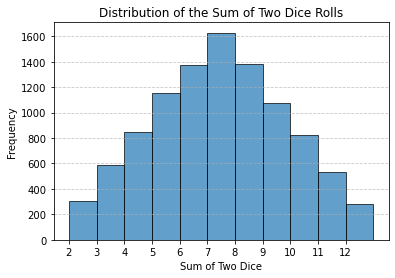

Theoretical Expected Value: 2.138888888888889
Experimental Expected Value: 6.9432
Theoretical Standard Deviation: 3.1622776601683795
Experimental Standard Deviation: 2.4367957977639407


In [48]:
# Using a discrete random variable because the sum of two dice is discrete.
# The probability distribution is uniform since each sum has an equal chance of occurring.

import math

"""
    This section defines a function roll_two_dice() that simulates rolling two dice and returning their sum. 
    It also specifies the number of simulations (num_simulations) you want to run, in this case, 10,000 times. 
    The results list will store the sum of two dice rolls for each simulation.

"""
def roll_two_dice():
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    return die1 + die2

number_of_simulations = 10000
results = [roll_two_dice() for i in range(number_of_simulations)]

# Calculate experimental expected value and standard deviation
experimental_mean = np.mean(results)
experimental_stddev = np.std(results)

"""
   The plot distribution create a histogram plot of the results using the matplotlib library (plt). 
   It visualizes the distribution of the sum of two dice rolls by plotting the frequency of each possible sum. 
   The code specifies various attributes of the plot, such as the title, labels, and grid. 
"""
plt.hist(results, bins=range(2, 14), edgecolor='k', alpha=0.7)
plt.title('Distribution of the Sum of Two Dice Rolls')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Frequency')
plt.xticks(range(2, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

"""
    calculates the theoretical mean (expected value) of the sum of two dice rolls based on 
    the probabilities of getting each possible sum.
"""
# Theoretical Expected Value:
# E(X) = (1/36) * Σ(x * P(x)), where x is the sum of two dice and P(x) is the probability of getting x
# E(X) = (1/36) * (2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11 + 12)
theoretical_mean = (1/36) * sum(range(2, 13))

# Theoretical Standard Deviation:
# Var(X) = E(X^2) - [E(X)]^2
# Var(X) = (1/36) * Σ(x^2 * P(x)) - [(1/36) * Σ(x * P(x))]^2
# Standard Deviation = sqrt(Var(X))
# Corrected calculation of theoretical standard deviation
a = 2  # Minimum sum of two dice
b = 12  # Maximum sum of two dice
theoretical_stddev = math.sqrt(((b - a + 1) ** 2 - 1) / 12)

# Compare theoretical and experimental values
print(f"Theoretical Expected Value: {theoretical_mean}")
print(f"Experimental Expected Value: {experimental_mean}")
print(f"Theoretical Standard Deviation: {theoretical_stddev}")
print(f"Experimental Standard Deviation: {experimental_stddev}")

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

## Discrete Random Variable and Uniform Probability Distribution
The code begins with a comment explaining that a discrete random variable is used because the sum of two dice is discrete. In probability theory, a discrete random variable represents distinct and separate outcomes, such as the sum of two dice rolls. Additionally, it mentions that the probability distribution is uniform, meaning that each possible sum has an equal chance of occurring. This uniform distribution is typical for fair six-sided dice.

## Dice Rolling Simulation 
The function called roll_two_dice() that simulates rolling two dice and returning their sum. The function generates random numbers between 1 and 6 for each die and then returns the sum of the two rolls. The number of simulations (number_of_simulations) is set to 10,000, and the results of these simulations are stored in a list called results.
Using randomness and repetition to mimic the real-world process of rolling two dice multiple times.

## Experimental Mean and Standard Deviation
After simulating the dice rolls, the calculates experimental mean (average) and standard deviation of the results using the np.mean() and np.std() functions. 

## Visualization with Histogram 
Creates a histogram plot of the simulation results using the matplotlib library (plt). This histogram visualizes the distribution of the sum of two dice rolls by showing the frequency of each possible sum. The plot includes a title, labels for the axes, and a grid for clarity.

## Theoretical Mean and Standard Deviation 
Calculates the theoretical mean (expected value) and standard deviation of the sum of two dice rolls based on probability theory. The theoretical mean represents the expected average sum, while the theoretical standard deviation measures the spread or variability of the outcomes.

## Comparison of Theoretical and Experimental Values
Compared the theoretical and experimental values for the mean and standard deviation. It prints these values to the console, allowing for a quantitative assessment of how closely the simulation results align with the theoretical expectations.

## Reference 

- “Python Random Number Generator: The Random Module || Python Tutorial || Learn Python Programming.” Www.youtube.com, www.youtube.com/watch?v=zWL3z7NMqAs&embeds_referring_euri=https%3A%2F%2Flearn.ul.ie%2F&feature=emb_logo. Accessed 17 Oct. 2023.
- zedstatistics. “Probability Distribution Functions (PMF, PDF, CDF).” YouTube, 2 Mar. 2020, www.youtube.com/watch?v=YXLVjCKVP7U.
- “Mastering Probability and Statistics in Python - Part 1.” Www.youtube.com, www.youtube.com/watch?v=KEhWSpdMCVk&list=PLVgEzPHodXi1wT9OK8B_W6Hs8Xc-gaG6N&index=2. Accessed 17 Oct. 2023.
- “Probability.” Mathsisfun.com, 2017, www.mathsisfun.com/data/probability.html.